# Synthesizing the chronology of late Mesoproterozoic Laurentia tectonics

## Import scientific Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Import compiled data

In [2]:
dates = pd.read_csv('../data/Mesoproterozoic_Laurentia_dates.csv')
dates.columns

Index(['Sample_No', 'Age', 'Error_Plus', 'Error_Minus', 'Age_Method',
       'Age_Interpretation', 'Age_Note', 'Age_Material', 'Age_Technique',
       'Age_Qualifier', 'Geological_Province', 'Province', 'Latitude',
       'Longitude', 'Location', 'Geological_Info', 'Rock_Type',
       'Rock_Description', 'References', 'Compilation_Source', 'Unnamed: 20',
       'UTM_Zone', 'UTM_Easting', 'UTM_Northing', 'Comment', 'Tectonic_Unit'],
      dtype='object')

## Define legend symbology

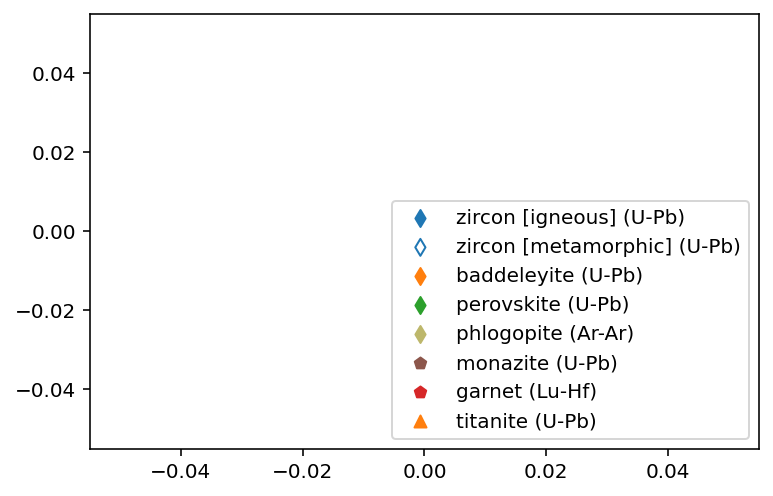

In [3]:
zircon_marker = plt.scatter([], [], c='C0', marker='d', label='zircon [igneous] (U-Pb)')
zircon_rim_marker = plt.scatter([], [], edgecolors='C0', color='none', marker='d', label='zircon [metamorphic] (U-Pb)')
bad_marker = plt.scatter([], [], c='C1', marker='d', label='baddeleyite (U-Pb)')
perov_marker = plt.scatter([], [], c='C2', marker='d', label='perovskite (U-Pb)')
phlog_marker = plt.scatter([], [], c='darkkhaki', marker='d', label='phlogopite (Ar-Ar)')
monazite_marker = plt.scatter([], [], marker='p',c='C5',label='monazite (U-Pb)')
garnet_marker = plt.scatter([], [], marker='p',color='C3',label='garnet (Lu-Hf)')
titanite_marker = plt.scatter([], [], marker='^',c='C1',label='titanite (U-Pb)')
plt.legend(handles=[zircon_marker,zircon_rim_marker,bad_marker,perov_marker,phlog_marker,monazite_marker,garnet_marker,titanite_marker],loc=4)
plt.show()

## Implement bootstrap method for duration estimates

In [4]:
def bootstrap_calc_plot(dates,bootstrap_n=10000,kde_bandwidth=0.8,plot=True):

    bootstrapped_mins = []
    bootstrapped_maxs = []

    for i in range(0,bootstrap_n):

        bootstrapped_dates = []

        resampled_data = dates.sample(n=len(dates),replace = True)
        resampled_data.reset_index(inplace=True)

        for n in resampled_data.index:
            bootstrapped_date = np.random.normal(resampled_data.Age[n], resampled_data.Error_Plus[n]/2, 1)
            bootstrapped_dates.append(bootstrapped_date[0])

        bootstrapped_mins.append(np.min(bootstrapped_dates)) 
        bootstrapped_maxs.append(np.max(bootstrapped_dates)) 
        if plot==True:
            if 1000-i > 0:
                sns.kdeplot(bootstrapped_dates,bw_adjust=kde_bandwidth,alpha=0.5,color='grey',shade=False,linewidth=0.1)
    
    if plot==True:
        sns.kdeplot(dates.Age,bw_adjust=kde_bandwidth,color='black')
            
    max_age = np.percentile(bootstrapped_maxs,5)
    min_age = np.percentile(bootstrapped_mins,95)
    
    return bootstrapped_maxs,bootstrapped_mins,max_age,min_age

def plot_bootstrap_hist(bootstrapped_maxs,bootstrapped_mins,max_age,min_age,age_range_max=1200,age_range_min=1100):
    hist_min = plt.hist(bootstrapped_mins,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap min',color='#F8C471')
    hist_max = plt.hist(bootstrapped_maxs,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap max',color='#48C9B0')
    rect = patches.Rectangle((min_age, 0), max_age-min_age, np.max(hist_max[0])*30, facecolor='lightgrey',zorder=-1,label=
                        'duration estimate')
    plt.gca().add_patch(rect)
    plt.ylim(0,np.max(hist_max[0])*1.1)

In [5]:
bootstrap_number = 10000

## AMCG

In [6]:
AMCG_dates = dates[dates.Geological_Info == 'AMCG']
AMCG_dates = AMCG_dates[AMCG_dates.Age_Interpretation == 'Igneous']
AMCG_dates = AMCG_dates.sort_values('Age',ascending=False)
AMCG_dates.reset_index(inplace=True)

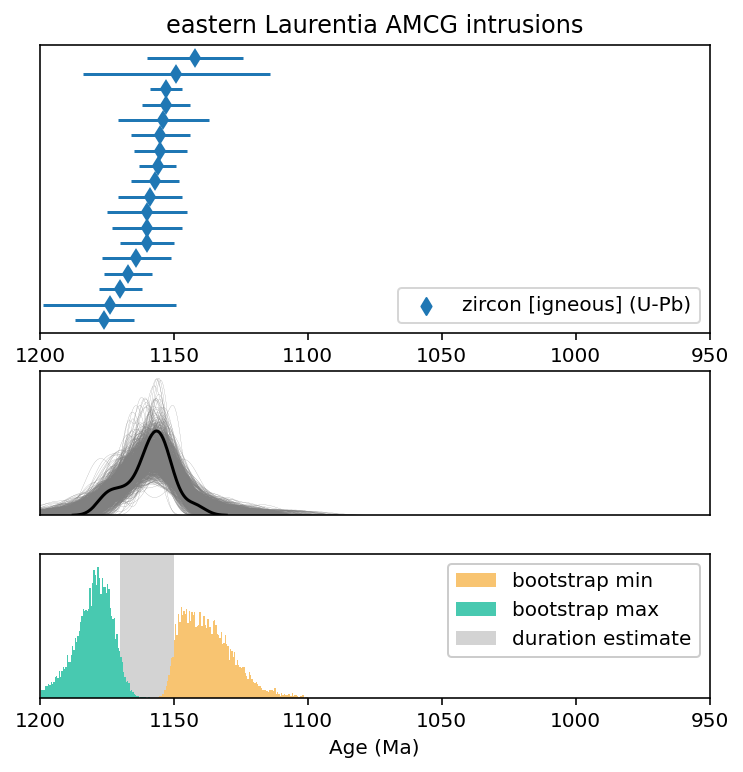

In [7]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('eastern Laurentia AMCG intrusions')

plt.errorbar(AMCG_dates.Age,
             AMCG_dates.index,
             xerr=AMCG_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')

ax0.set_yticks([])

plt.legend(handles=[zircon_marker],loc=4)
plt.xlim(1200,950)

ax1 = fig.add_subplot(spec[1])

boot_maxs,boot_mins,AMCG_max,AMCG_min = bootstrap_calc_plot(AMCG_dates,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,AMCG_max,AMCG_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_AMCG.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [8]:
AMCG_max = np.percentile(boot_maxs,2.5)
AMCG_min = np.percentile(boot_mins,97.5)

AMCG_max_median = np.median(boot_maxs)
AMCG_min_median = np.median(boot_mins)

print(AMCG_max)
print(AMCG_min)

print(AMCG_max_median)
print(AMCG_min_median)

1168.527419623163
1151.0120823330533
1179.4285524122404
1138.4842776694438


## Midcontinent crystallization dates (preceding Midcontinent Rift)

In [9]:
Abitibi_dates = dates[dates.Geological_Province == 'Midcontinent']
Abitibi_dates = Abitibi_dates.sort_values('Age',ascending=False)
Abitibi_dates.reset_index(inplace=True)

Abitibi_dates_b = Abitibi_dates[Abitibi_dates.Age_Material == 'Baddeleyite']
Abitibi_dates_perov = Abitibi_dates[Abitibi_dates.Age_Material == 'Perovskite']
Abitibi_dates_phlog = Abitibi_dates[Abitibi_dates.Age_Material == 'Phlogopite']

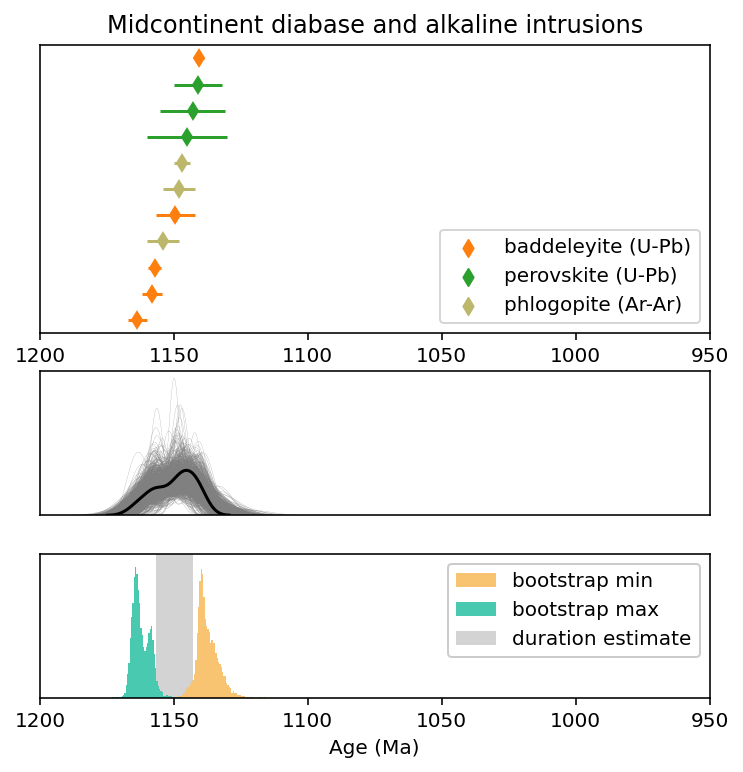

In [10]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent diabase and alkaline intrusions')

plt.errorbar(Abitibi_dates_b.Age,
             Abitibi_dates_b.index,
             xerr=Abitibi_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.errorbar(Abitibi_dates_perov.Age,
             Abitibi_dates_perov.index,
             xerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.Age,
             Abitibi_dates_phlog.index,
             xerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[bad_marker,perov_marker,phlog_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Abitibi_max,Abitibi_min = bootstrap_calc_plot(Abitibi_dates,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,Abitibi_max,Abitibi_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Abitibi_Alkaline.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [11]:
Abitibi_max = np.percentile(boot_maxs,2.5)
Abitibi_min = np.percentile(boot_mins,97.5)

Abitibi_max_median = np.median(boot_maxs)
Abitibi_min_median = np.median(boot_mins)

print(Abitibi_max)
print(Abitibi_min)

print(Abitibi_max_median)
print(Abitibi_min_median)

1155.7370266265323
1144.497331784728
1162.9295628320701
1138.3294947565087


## Midcontinent Rift magmatic activity

In [12]:
MCR_dates = dates[dates.Geological_Province == 'Midcontinent Rift']
MCR_dates = MCR_dates.sort_values('Age',ascending=False)
MCR_dates.reset_index(inplace=True)

MCR_dates_b = MCR_dates[MCR_dates.Age_Material == 'Baddeleyite']
MCR_dates_z = MCR_dates[MCR_dates.Age_Material == 'Zircon']

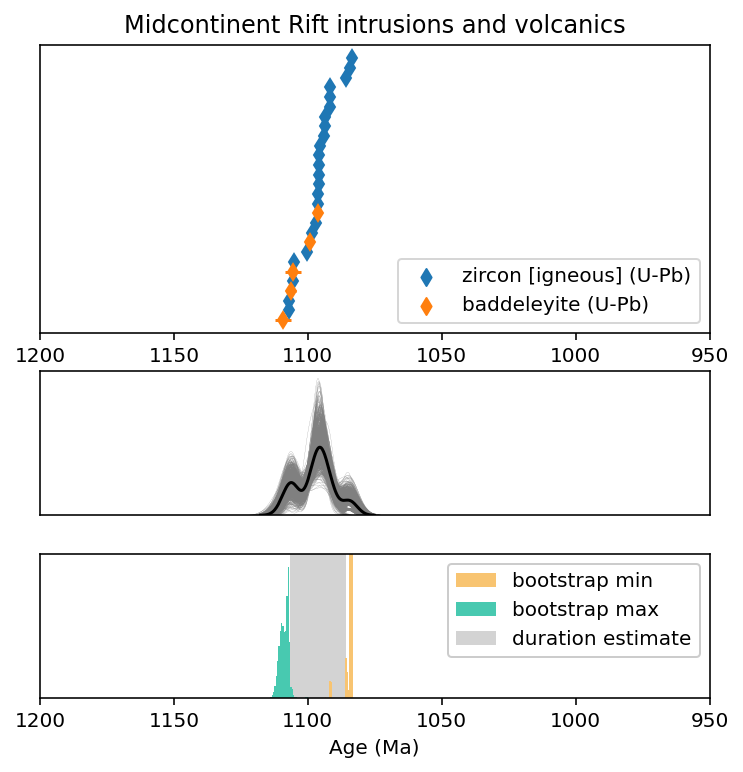

In [13]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent Rift intrusions and volcanics')

plt.errorbar(MCR_dates_z.Age,
             MCR_dates_z.index,
             xerr=MCR_dates_z.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(MCR_dates_b.Age,
             MCR_dates_b.index,
             xerr=MCR_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker,bad_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,MCR_max,MCR_min = bootstrap_calc_plot(MCR_dates,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,MCR_max,MCR_min,age_range_max=1150,age_range_min=1050)

plt.legend(framealpha=1)
plt.xlim(1200,950)
plt.gca().set_ylabel('')
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_MCR.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [14]:
MCR_max = np.percentile(boot_maxs,2.5)
MCR_min = np.percentile(boot_mins,97.5)

MCR_max_median = np.median(boot_maxs)
MCR_min_median = np.median(boot_mins)

print(MCR_max)
print(MCR_min)

print(MCR_max_median)
print(MCR_min_median)

1106.4382530390183
1091.482437674287
1108.6257360228524
1083.573321565811


## Joint Midcontinent Plot


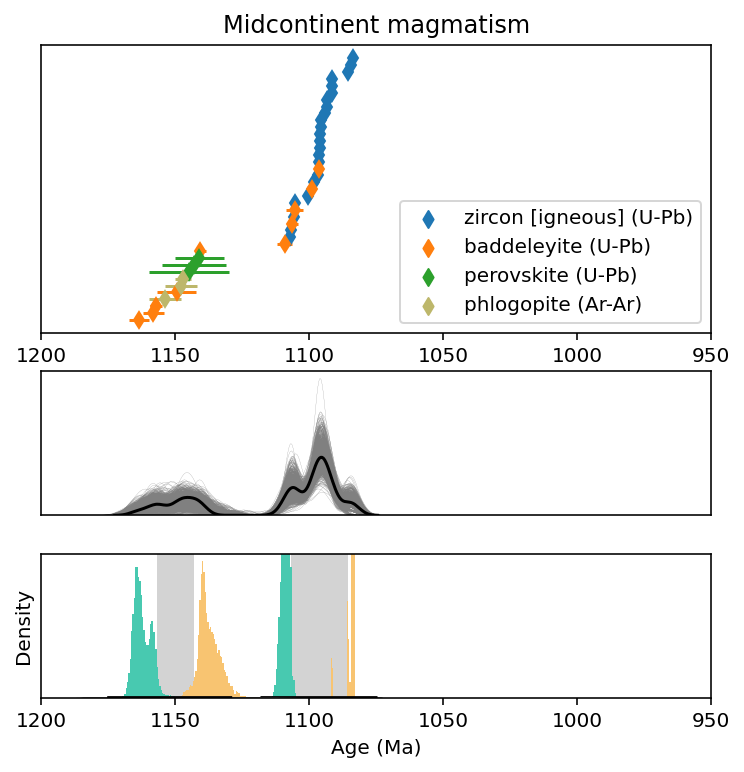

In [15]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent magmatism')

plt.errorbar(Abitibi_dates_b.Age,
             Abitibi_dates_b.index,
             xerr=Abitibi_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.errorbar(Abitibi_dates_perov.Age,
             Abitibi_dates_perov.index,
             xerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.Age,
             Abitibi_dates_phlog.index,
             xerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

plt.errorbar(MCR_dates_z.Age,
             MCR_dates_z.index+len(Abitibi_dates),
             xerr=MCR_dates_z.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(MCR_dates_b.Age,
             MCR_dates_b.index+len(Abitibi_dates),
             xerr=MCR_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker,bad_marker,perov_marker,phlog_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Midcontinent_max,Midcontinent_max = bootstrap_calc_plot(pd.concat([Abitibi_dates,MCR_dates]),
                                                                            kde_bandwidth=0.25,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])

boot_maxs,boot_mins,MCR_max,MCR_min = bootstrap_calc_plot(MCR_dates,bootstrap_n=bootstrap_number)
plot_bootstrap_hist(boot_maxs,boot_mins,MCR_max,MCR_min,age_range_max=1150,age_range_min=1050)

boot_maxs,boot_mins,Abitibi_max,Abitibi_min = bootstrap_calc_plot(Abitibi_dates,bootstrap_n=bootstrap_number)
plot_bootstrap_hist(boot_maxs,boot_mins,Abitibi_max,Abitibi_min)

plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Midcontinent.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

## Blue Ridge metamorphism dates

Metamorphic dates from the Blue Ridge are compiled using the same headers as the GSC Knowledgebase

In [16]:
Blue_Ridge_dates = dates[(dates.Geological_Province == 'Blue Ridge') & (dates.Age_Material != 'Titanite')]
Blue_Ridge_dates = Blue_Ridge_dates.sort_values('Age',ascending=False)
Blue_Ridge_dates.reset_index(inplace=True)
Blue_Ridge_dates.tail(1)

,index,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,...,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Easting,UTM_Northing,Comment,Tectonic_Unit
46,682,MR-11-193,984.0,17.0,NaN,NaN,Metamorphic,76 weighted mean,Zircon,SHRIMP,...,NaN,Ylbg lineated biotite meta-granite,NaN,compiled by NSH,Tollo2017a,NaN,NaN,NaN,NaN,NaN


In [17]:
Blue_Ridge_dates_Shaw = Blue_Ridge_dates[Blue_Ridge_dates.Age>1120]
Blue_Ridge_dates_Gren = Blue_Ridge_dates[Blue_Ridge_dates.Age<1120]

In [18]:
Blue_Ridge_dates_z = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Zircon']
#Blue_Ridge_dates_t = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Titanite']
Blue_Ridge_dates_g = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Garnet']
Blue_Ridge_dates_m = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Monazite']

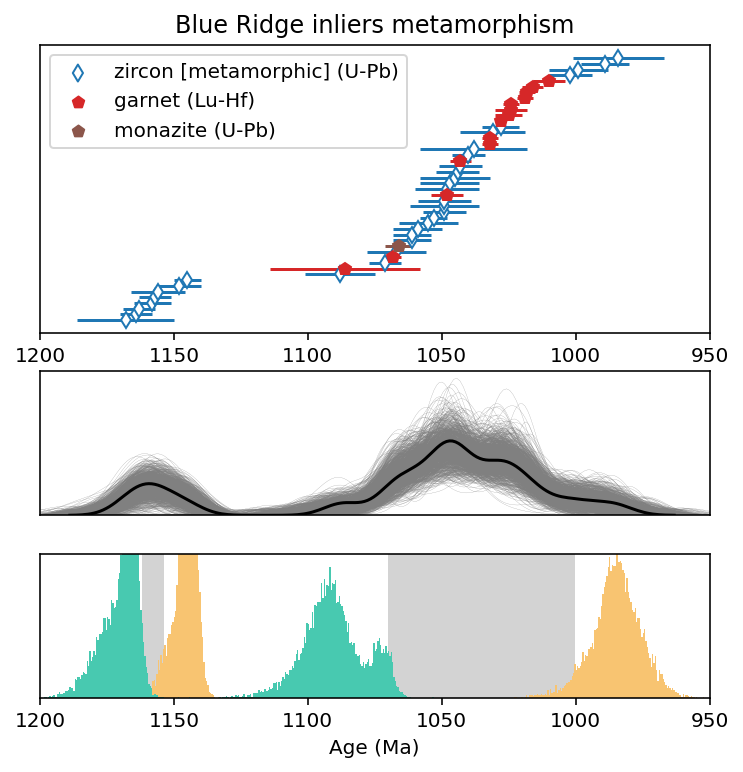

In [62]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])


ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Blue Ridge inliers metamorphism')

plt.errorbar(Blue_Ridge_dates_z.Age,
             Blue_Ridge_dates_z.index,
             xerr=Blue_Ridge_dates_z.Error_Plus,
             fmt='d',color='C0',mfc='white',label='zircon rims')

# plt.errorbar(Blue_Ridge_dates_t.Age,
#              Blue_Ridge_dates_t.index,
#              xerr=Blue_Ridge_dates_t.Error_Plus,
#              fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.Age,
             Blue_Ridge_dates_g.index,
             xerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.Age,
             Blue_Ridge_dates_m.index,
             xerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.legend(handles=[zircon_rim_marker,garnet_marker,monazite_marker],loc=2)

fig.add_subplot(spec[1])
boot_maxs,boot_mins,Blue_Ridge_max,Blue_Ridge_min = bootstrap_calc_plot(Blue_Ridge_dates,bootstrap_n=bootstrap_number,kde_bandwidth=0.3)

plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min = bootstrap_calc_plot(Blue_Ridge_dates_Shaw,bootstrap_n=bootstrap_number,
                                                                                  kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min,age_range_max=1200,age_range_min=950)

Blue_Ridge_Shaw_max_median = np.median(boot_maxs)
Blue_Ridge_Shaw_min_median = np.median(boot_mins)

boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min = bootstrap_calc_plot(Blue_Ridge_dates_Gren,bootstrap_n=bootstrap_number,
                                                                                  kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min,age_range_max=1200,age_range_min=950)

Blue_Ridge_Gren_max_median = np.median(boot_maxs)
Blue_Ridge_Gren_min_median = np.median(boot_mins)

#plt.legend(framealpha=1,bbox_to_anchor=(1.4,1))
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.xlim(1200,950)
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Blue_Ridge.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [20]:
print(Blue_Ridge_Shaw_max)
print(Blue_Ridge_Shaw_min)
print('')
print(Blue_Ridge_Shaw_max_median)
print(Blue_Ridge_Shaw_min_median)
print('')
print(Blue_Ridge_Gren_max)
print(Blue_Ridge_Gren_min)
print('')
print(Blue_Ridge_Gren_max_median)
print(Blue_Ridge_Gren_min_median)

1161.7961765111377
1153.454283297341

1070.1687415768165
1000.1816508830879

1091.0282707116385
984.5716776320573


## Grenville metamorphism

In [21]:
Grenville_Province_dates = dates[dates.Geological_Province == 'Grenville Province']
Grenville_Province_dates = Grenville_Province_dates.sort_values('Age',ascending=False)
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Age'] < 1250]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Error_Plus'] < 40]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Error_Plus'] != 0]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Age_Qualifier'] != 'Unverified']

In [22]:
Adirondack_dates_meta = dates[(dates.Geological_Province == 'Adirondacks') & (dates.Age_Interpretation == 'Metamorphic')]
Adirondack_dates_meta

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,...,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Easting,UTM_Northing,Comment,Tectonic_Unit
791,AM87-10,1049.0,4.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Minerva charnockite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
793,AM86-8,1031.0,30.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Snowy Mountain mangerite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
795,AM87-9,1041.0,6.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Gore Mountain charnockite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
797,AM87-8,1048.0,10.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Oregon Dome ferrodiorite interpretted to be co...,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
813,cm,1042.0,4.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Metamorphic,diopside-bearing quartzite with metamorphic zi...,NaN,compiled by NSH,Chiarenzelli2011b,NaN,NaN,NaN,NaN,NaN
814,cm,1073.0,15.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Metamorphic,diopside-bearing quartzite with metamorphic zi...,NaN,compiled by NSH,Chiarenzelli2011b,NaN,NaN,NaN,NaN,NaN
815,16TG-154,1167.0,9.4,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN
816,16TG-154,1163.0,6.0,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN
817,16TG-154,1159.0,13.0,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN


In [23]:
Grenville_dates_t = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'titanite')|(Grenville_Province_dates.Age_Material == 'Titanite')]

Grenville_dates_m = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'Monazite')]
Grenville_dates_z = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'Zircon')
                                             &(Grenville_Province_dates.Age_Technique != 'TIMS')]

Grenville_dates_m_z = pd.concat([Grenville_dates_m,Grenville_dates_z,Adirondack_dates_meta])
Grenville_dates_m_z = Grenville_dates_m_z.sort_values('Age',ascending=False)
Grenville_dates_m_z.reset_index(inplace=True)
Grenville_dates_m =  Grenville_dates_m_z[(Grenville_dates_m_z.Age_Material == 'Monazite')]
Grenville_dates_z =  Grenville_dates_m_z[(Grenville_dates_m_z.Age_Material == 'Zircon')]

In [24]:
Grenville_dates_m_z_Gren = Grenville_dates_m_z[Grenville_dates_m_z.Age < 1100 ]
Grenville_dates_m_z_Shaw = Grenville_dates_m_z[Grenville_dates_m_z.Age > 1140]

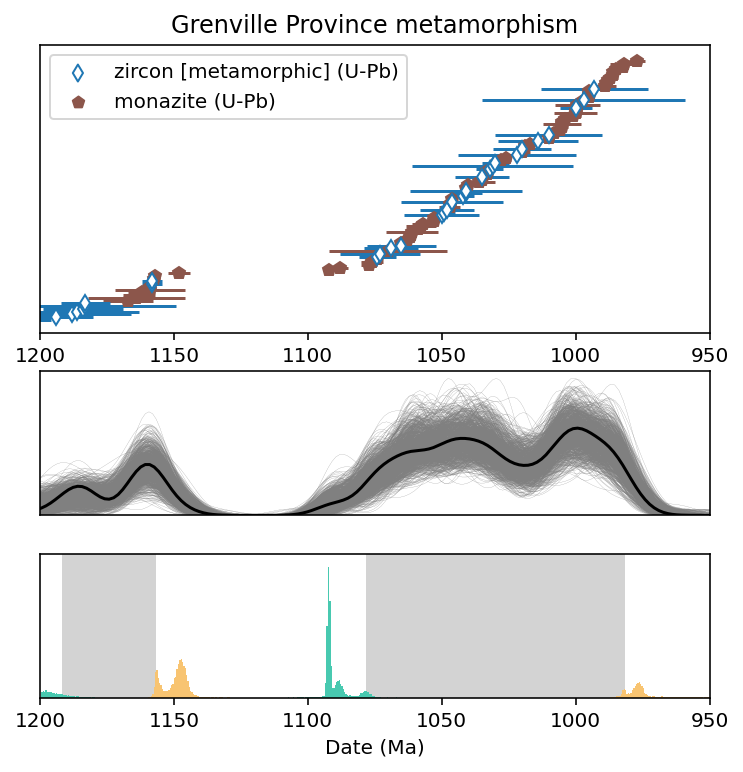

In [25]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Grenville Province metamorphism')

# plt.errorbar(Grenville_dates_t.Age,
#              Grenville_dates_t.index,
#              xerr=Grenville_dates_t.Error_Plus,
#              fmt='^',color='C1',label='titanite')

plt.errorbar(Grenville_dates_m.Age,
             Grenville_dates_m.index,
             xerr=Grenville_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.errorbar(Grenville_dates_z.Age,
             Grenville_dates_z.index,
             xerr=Grenville_dates_z.Error_Plus,
             fmt='d',color='C0',mfc='white',label='zircon rims')


plt.xlim(1200,950)
plt.gca().set_yticks([])

plt.legend(handles=[zircon_rim_marker,monazite_marker],loc=2)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Grenville_max,Grenville_min = bootstrap_calc_plot(Grenville_dates_m_z,bootstrap_n=bootstrap_number,kde_bandwidth=0.25)


plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
boot_maxs,boot_mins,Grenville_Shaw_max,Grenville_Shaw_min = bootstrap_calc_plot(Grenville_dates_m_z_Shaw,
                                                                                bootstrap_n=bootstrap_number,kde_bandwidth=0.8,plot=False)
Grenville_Shaw_max_median = np.median(boot_maxs)
Grenville_Shaw_min_median = np.median(boot_mins)
plot_bootstrap_hist(boot_maxs,boot_mins,Grenville_Shaw_max,Grenville_Shaw_min,age_range_max=1200,age_range_min=950)

boot_maxs,boot_mins,Grenville_Gren_max,Grenville_Gren_min = bootstrap_calc_plot(Grenville_dates_m_z_Gren,
                                                                                bootstrap_n=bootstrap_number,kde_bandwidth=0.8,plot=False)
Grenville_Gren_max_median = np.median(boot_maxs)
Grenville_Gren_min_median = np.median(boot_mins)
plot_bootstrap_hist(boot_maxs,boot_mins,Grenville_Gren_max,Grenville_Gren_min,age_range_max=1200,age_range_min=950)

plt.xlim(1200,950)
plt.xlabel('Date (Ma)')
plt.gca().set_yticks([])
plt.gca().set_ylabel('')

plt.savefig('geochron_Grenville.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [26]:
print(Grenville_Shaw_max)
print(Grenville_Shaw_min)
print('')
print(Grenville_Shaw_max_median)
print(Grenville_Shaw_min_median)
print('')
print(Grenville_Gren_max)
print(Grenville_Gren_min)
print('')
print(Grenville_Gren_max_median)
print(Grenville_Gren_min_median)

1191.6534593059716
1156.7835905111692

1210.3700410530146
1148.3137867165258

1078.152979558641
981.4837273066836

1091.8066647467867
916.4587718643413


In [27]:
import matplotlib.image as mpimg

geochron_Grenville_img = mpimg.imread('geochron_Grenville.png')
geochron_Blue_Ridge_img = mpimg.imread('geochron_Blue_Ridge.png')
geochron_AMCG_img = mpimg.imread('geochron_AMCG.png')
geochron_Abitibi_img = mpimg.imread('geochron_Abitibi_Alkaline.png')
geochron_MCR_img = mpimg.imread('geochron_MCR.png')
geochron_Midcontinent_img = mpimg.imread('geochron_Midcontinent.png')

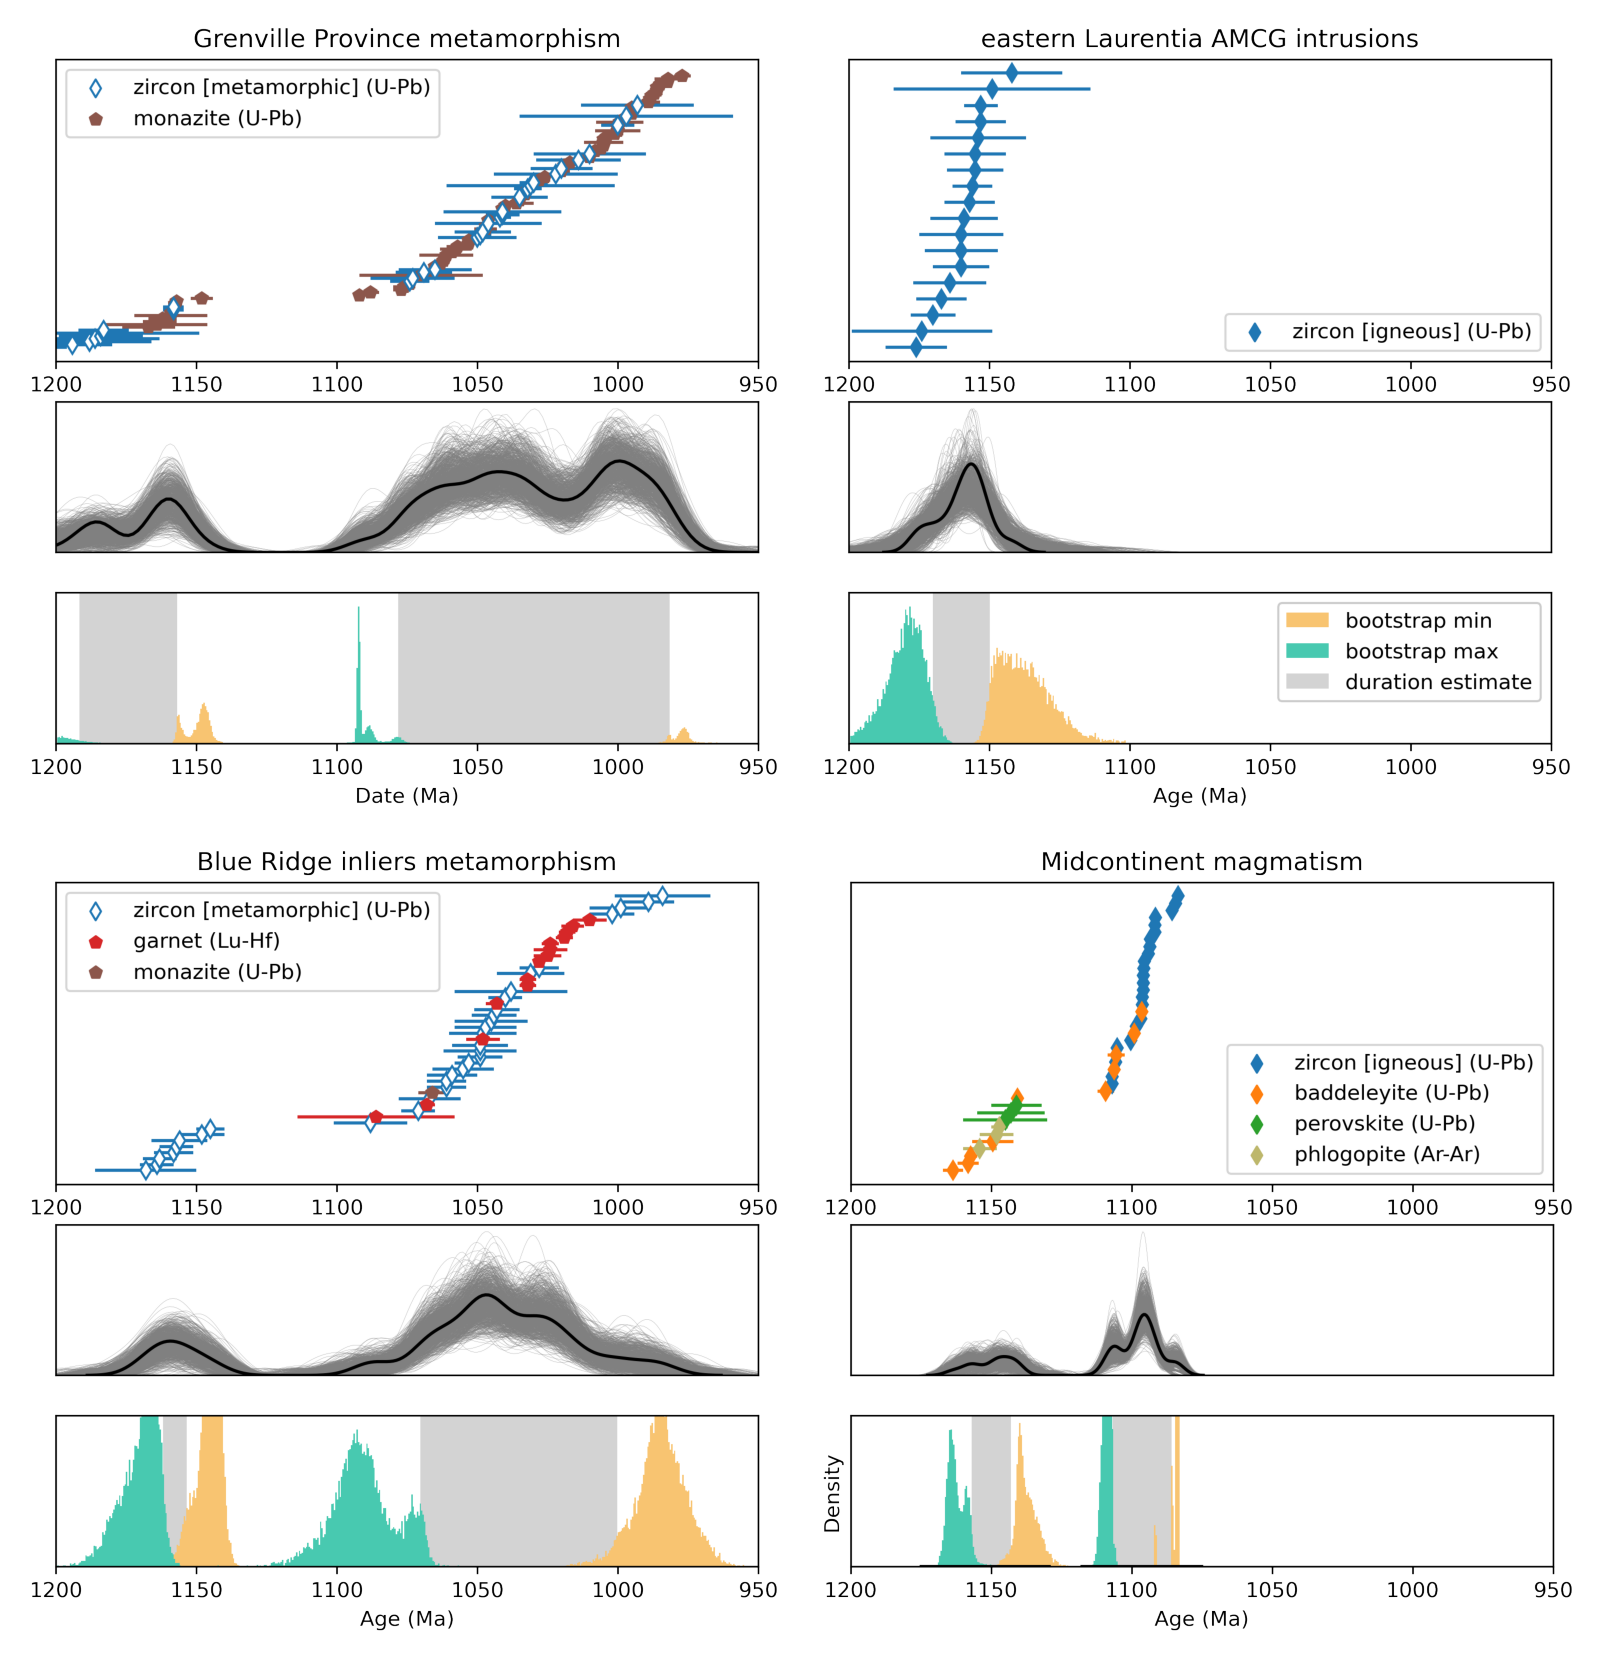

In [28]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [geochron_Grenville_img,
                         geochron_AMCG_img,
                         geochron_Blue_Ridge_img,
                         geochron_Midcontinent_img]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")


plt.subplots_adjust(wspace=-5, hspace=-5)

plt.savefig('geochron_figure.png',dpi=300)
plt.show()

## Summary timelines

In [42]:
Grenville_Gren_min-Grenville_Gren_max

-96.66925225195735

1161.955288533983
1153.5580629803146

1168.0776805165729
1144.745544706974

1070.1263935619102
1000.3858956622774

1090.8924400423668
984.5271666304641


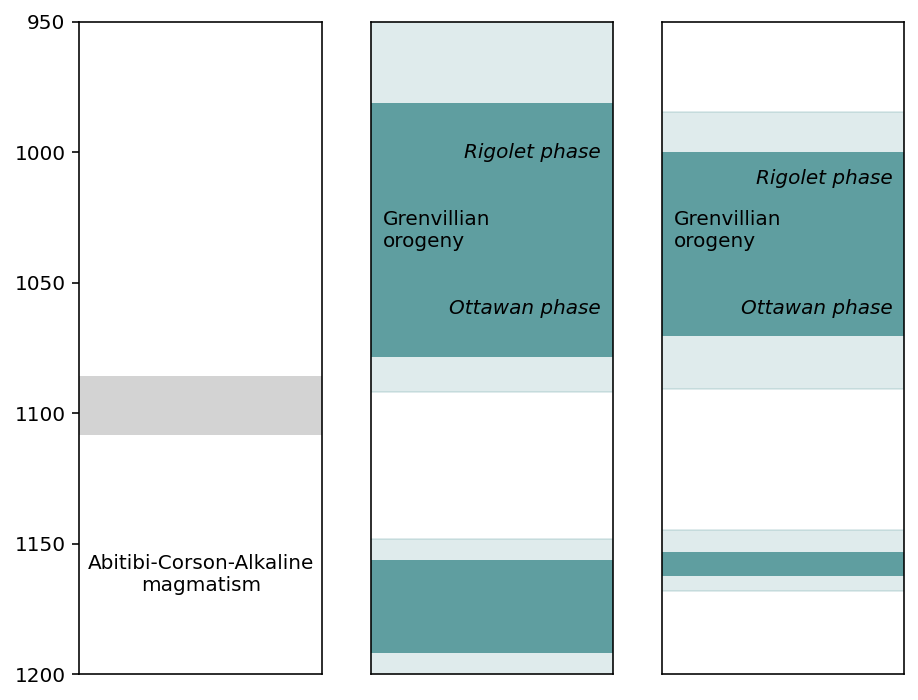

In [78]:
fig = plt.figure(figsize=(10,6))
spec = gridspec.GridSpec(ncols=4, nrows=1,
                         width_ratios=[1, 1, 1, 1])

ax0 = fig.add_subplot(spec[0])

median_MCR_rect = matplotlib.patches.Rectangle((-1, 1108),2, -22, color='lightgrey')
ax0.add_patch(median_MCR_rect)


plt.text(0.5,1168,'Abitibi-Corson-Alkaline\nmagmatism',horizontalalignment='center')

plt.ylim(1200,950)
plt.gca().set_xticks([])

ax1 = fig.add_subplot(spec[1])

Grenville_Shaw_median_rect = matplotlib.patches.Rectangle((-1, Grenville_Shaw_max_median),2, Grenville_Shaw_min_median-Grenville_Shaw_max_median, color='cadetblue', alpha=0.2)
ax1.add_patch(Grenville_Shaw_median_rect)

Grenville_Shaw_rect = matplotlib.patches.Rectangle((-1, Grenville_Shaw_max),2, Grenville_Shaw_min-Grenville_Shaw_max, color='cadetblue')
ax1.add_patch(Grenville_Shaw_rect)

Grenville_Grenville_median_rect = matplotlib.patches.Rectangle((-1, Grenville_Gren_max_median),2, Grenville_Gren_min_median-Grenville_Gren_max_median, color='cadetblue', alpha=0.2)
ax1.add_patch(Grenville_Grenville_median_rect)

Grenville_Grenville_rect = matplotlib.patches.Rectangle((-1, Grenville_Gren_max),2, Grenville_Gren_min-Grenville_Gren_max, color='cadetblue')
ax1.add_patch(Grenville_Grenville_rect)

plt.text(0.05,(Grenville_Gren_max+Grenville_Gren_min)/2,'Grenvillian\norogeny',horizontalalignment='left',verticalalignment='center')
plt.text(0.95,1060,'Ottawan phase',horizontalalignment='right',verticalalignment='center',style='italic')
plt.text(0.95,1000,'Rigolet phase',horizontalalignment='right',verticalalignment='center',style='italic')

plt.ylim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xticks([])

ax2 = fig.add_subplot(spec[2])

Blue_Ridge_Shaw_median_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Shaw_max_median),2, Blue_Ridge_Shaw_min_median-Blue_Ridge_Shaw_max_median, color='cadetblue', alpha=0.2)
ax2.add_patch(Blue_Ridge_Shaw_median_rect)

Blue_Ridge_Shaw_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Shaw_max),2, Blue_Ridge_Shaw_min-Blue_Ridge_Shaw_max, color='cadetblue')
ax2.add_patch(Blue_Ridge_Shaw_rect)

Blue_Ridge_Grenville_median_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Gren_max_median),2, Blue_Ridge_Gren_min_median-Blue_Ridge_Gren_max_median, color='cadetblue', alpha=0.2)
ax2.add_patch(Blue_Ridge_Grenville_median_rect)

Blue_Ridge_Grenville_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Gren_max),2, Blue_Ridge_Gren_min-Blue_Ridge_Gren_max, color='cadetblue')
ax2.add_patch(Blue_Ridge_Grenville_rect)

plt.text(0.05,(Grenville_Gren_max+Grenville_Gren_min)/2,'Grenvillian\norogeny',horizontalalignment='left',verticalalignment='center')
plt.text(0.95,1060,'Ottawan phase',horizontalalignment='right',verticalalignment='center',style='italic')
plt.text(0.95,1000,'Rigolet phase',horizontalalignment='right',verticalalignment='center',style='italic')

plt.ylim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xticks([])



print(Blue_Ridge_Shaw_max)
print(Blue_Ridge_Shaw_min)
print('')
print(Blue_Ridge_Shaw_max_median)
print(Blue_Ridge_Shaw_min_median)
print('')
print(Blue_Ridge_Gren_max)
print(Blue_Ridge_Gren_min)
print('')
print(Blue_Ridge_Gren_max_median)
print(Blue_Ridge_Gren_min_median)

In [ ]:
print(Grenville_Shaw_max)
print(Grenville_Shaw_min)
print('')
print(Grenville_Shaw_max_median)
print(Grenville_Shaw_min_median)
print('')
print(Grenville_Gren_max)
print(Grenville_Gren_min)
print('')
print(Grenville_Gren_max_median)
print(Grenville_Gren_min_median)

(1200.0, 950.0)

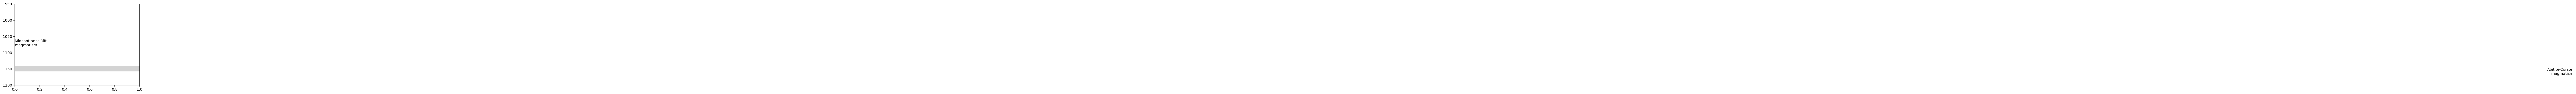

In [30]:
median_MCR_rect = matplotlib.patches.Rectangle((-1, 1108),len(MCR_dates.index)+1, -22, color='lightgrey')
ax0.add_patch(median_MCR_rect)


plt.text(0,1080,'Midcontinent Rift\nmagmatism')

rectangle = matplotlib.patches.Rectangle((-1, Abitibi_max),len(MCR_dates.index)+1, Abitibi_min - Abitibi_max, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(20.5,1168,'Abitibi-Corson\nmagmatism',horizontalalignment='right')

plt.ylim(1200,950)

NameError: name 'Blue_Ridge_dates_t' is not defined

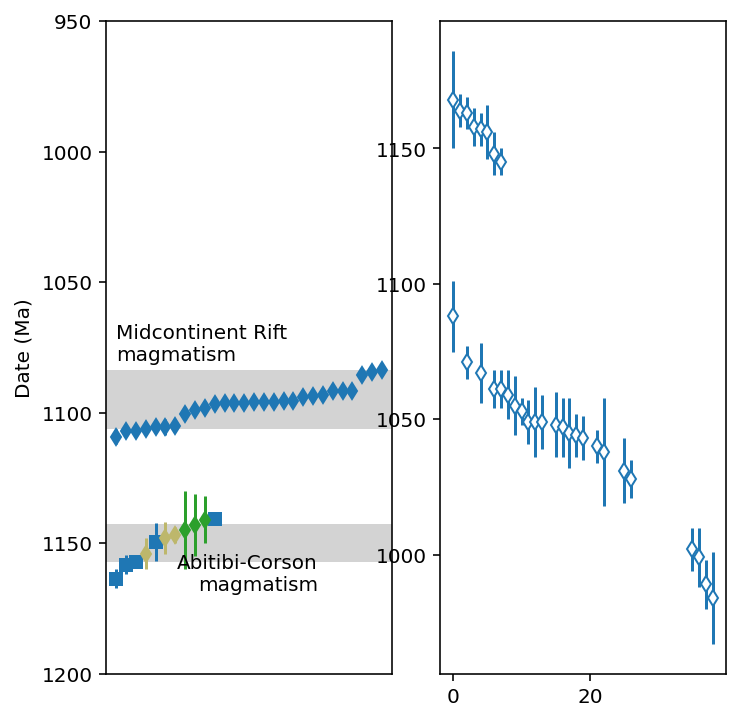

In [29]:
fig = plt.figure(figsize=(10,6))
spec = gridspec.GridSpec(ncols=4, nrows=1,
                         width_ratios=[1, 1, 0.4, 1])

#Midcontinent
fig.add_subplot(spec[0])

plt.errorbar(MCR_dates.index,
             MCR_dates.Age,
             yerr=MCR_dates.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(Abitibi_dates_b.index,
             Abitibi_dates_b.Age,
             yerr=Abitibi_dates_b.Error_Plus,
             fmt='s',color='C0')

plt.errorbar(Abitibi_dates_perov.index,
             Abitibi_dates_perov.Age,
             yerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.index,
             Abitibi_dates_phlog.Age,
             yerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

rectangle = matplotlib.patches.Rectangle((-1, 1106),len(MCR_dates.index)+1, -22, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(0,1080,'Midcontinent Rift\nmagmatism')

rectangle = matplotlib.patches.Rectangle((-1, Abitibi_max),len(MCR_dates.index)+1, Abitibi_min - Abitibi_max, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(20.5,1168,'Abitibi-Corson\nmagmatism',horizontalalignment='right')

plt.ylim(1200,950)
plt.xlim(-1,len(MCR_dates.index))
plt.gca().set_xticks([])
plt.ylabel('Date (Ma)')

fig.add_subplot(spec[1])

plt.errorbar(Blue_Ridge_dates_z.index[0:8],
             Blue_Ridge_dates_z.Age[0:8],
             yerr=Blue_Ridge_dates_z.Error_Plus[0:8],
             fmt='d',color='C0', markerfacecolor='white',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_z.index[8:]-8,
             Blue_Ridge_dates_z.Age[8:],
             yerr=Blue_Ridge_dates_z.Error_Plus[8:],
             fmt='d',color='C0', markerfacecolor='white',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_t.index-8,
             Blue_Ridge_dates_t.Age,
             yerr=Blue_Ridge_dates_t.Error_Plus,
             fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.index-8,
             Blue_Ridge_dates_g.Age,
             yerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.index-8,
             Blue_Ridge_dates_m.Age,
             yerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

rectangle = matplotlib.patches.Rectangle((-1, 1083),len(Blue_Ridge_dates.index)+1, -24, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(44,1080,'Ottawan\nmetamorphism',horizontalalignment='right')

rectangle = matplotlib.patches.Rectangle((-1, 1165),len(Blue_Ridge_dates.index)+1, -15, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(44,1165,'Shawinigan\nmetamorphism',horizontalalignment='right')

plt.ylim(1200,950)
plt.xlim(-1,len(Blue_Ridge_dates.index)-8)
plt.gca().set_xticks([])




fig.add_subplot(spec[2])

sns.kdeplot(y=Blue_Ridge_dates.Age,bw_adjust=0.25,color='black')
plt.ylim(1200,950)

plt.gca().axis('off')
zircon_marker = plt.errorbar([], [], c='C0', marker='d', label='zircon (U-Pb)')
zircon_rim_marker = plt.errorbar([], [], c='C0', marker='d', markerfacecolor='white', label='zircon rim (U-Pb)')
bad_marker = plt.errorbar([], [], c='C0', marker='s', label='baddeleyite (U-Pb)')
perov_marker = plt.errorbar([], [], c='C2', marker='d', label='perovskite (U-Pb)')
phlog_marker = plt.errorbar([], [], c='darkkhaki', marker='d', label='phlogopite (Ar-Ar)')
legend_ig = plt.legend(handles=[zircon_marker,
                    bad_marker,
                    perov_marker,
                    phlog_marker],loc= 'upper center',title='igneous dates')
legend_meta = plt.legend(handles=[zircon_rim_marker],
                         loc= 'lower center',title='metamorphic dates')
plt.gca().add_artist(legend_ig)
plt.gca().add_artist(legend_meta)

plt.tight_layout()
plt.show()

## Import the Canadian Geochronology Knowledgebase

The CGKB compilation represents publicly available geochronological information for  Canada. The data is compiled from federal, provincial and territorial government publications and reports, university theses, books and journal articles.

https://www.nrcan.gc.ca/maps-tools-publications/tools/geodetic-reference-systems/canadian-geochronology-knowledgebase/18211

In [ ]:
GSC_data = pd.read_csv('../data/GSC_compilation/Geochron_en.txt',sep='\t')
GSC_data.head(1)

In [ ]:
GSC_data_meta = GSC_data[(GSC_data.Age_Interpretation == 'Peak Metamorphic') | (GSC_data.Age_Interpretation == 'Metamorphic')]
GSC_data_ign = GSC_data[(GSC_data.Age_Interpretation == 'Igneous Crystallization')]
GSC_data_meta_Grenville = GSC_data_meta[GSC_data_meta.Geological_Province == 'Grenville Province']
GSC_data_meta_Grenville.head(1)

In [ ]:
Grenville_monazite = GSC_data_meta[(GSC_data_meta.Geological_Province == 'Grenville Province') & 
                                   (GSC_data_meta.Age_Material == 'Monazite') &  
                                    (GSC_data_meta.Error_Plus != 0) &  
                                    (GSC_data_meta.Error_Plus < 20)]

Grenville_monazite = Grenville_monazite[Grenville_monazite.Age_Note != 'Grey-literature: information and age quality to be verified by user']
Grenville_monazite = Grenville_monazite.sort_values('Age')
Grenville_monazite.reset_index(inplace=True)
Grenville_monazite.to_csv('../data/GSC_compilation/GSC_data_meta_Grenville_monazite.csv')

In [ ]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_monazite.Age,
             Grenville_monazite.index,
             xerr=Grenville_monazite.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_monazite.Age,bw_adjust=0.2,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(MCR_dates.U_Pb_sample_mean,bw_adjust=1,color='tomato',ax=ax,label='Midcontinent Rift magmatism')
ax.set_yticks([])
plt.xlabel('Date (Ma)')
plt.legend(loc='upper left',bbox_to_anchor=[0,1.12])

ax2 = ax.twinx()
sns.kdeplot(Grenville_dates.Date,bw_adjust=0.3,color='C0',ax=ax2,label='Blue Ridge metamorphism')
ax2.set_yticks([])
plt.legend(loc='upper left',bbox_to_anchor=[0,1.2])
plt.ylabel('')
plt.xlabel('')
plt.xlim(1200,950)
plt.show()

In [ ]:
bootstrapped_dates

In [ ]:
Grenville_dates.Date

In [ ]:
def weighted_mean(dates,sigma):
    
    """
    calculated a weighted mean from dates and uncertainities
    
    input parameters
    ----------------
    dates: date of individual grains
    sigma: 1 sigma uncertainty associated with dates
    
    returns
    ----------------
    weighted_mean, 2 sigma uncertainty
    
    """
    
    inverse_variance=[]
    alpha=[]
    weighted_mean_calc=[]
    
    for n in range(0,len(dates)):
        value = 1/sigma[n]**2
        inverse_variance.append(value)
    inverse_variance_sum = np.sum(inverse_variance)
    
    for n in range(0,len(dates)):
        value = (1/sigma[n]**2)/inverse_variance_sum
        alpha.append(value)
        
    #calculate the weights for each date
    for n in range(0,len(dates)):
        value = alpha[n]*dates[n]
        weighted_mean_calc.append(value)
    
    #take the sum of the weights multiplied by the dates to get the weighted
    #mean (equation 64 of McLean et al., 2011)
    weighted_mean = np.sum(weighted_mean_calc)
    
    #the variance of the weighted mean is simply the inverse of the sum of
    #the inverse variances of each date (equation 66 of McLean et al., 2011)
    variance = 1/inverse_variance_sum
    
    weighted_mean_sigma = np.sqrt(variance)
    
    n = len(dates)
    
    print('The weighted mean is:')

    print(weighted_mean)

    print('With a 2sigma error of:')

    print(2*weighted_mean_sigma)
    
    print('N=' )
    print(n)
    
    return weighted_mean, 2*weighted_mean_sigma

Data from **Constraints on the timing and duration of orogenic events by combined Lu–Hf and Sm–Nd geochronology: An example from the Grenville orogeny**

Errors are 1$\sigma$

In [ ]:
J2018_z = pd.read_csv('../data/Johnson2018/Johnson2018_zircon.csv')
J2018_z_rim = J2018_z[J2018_z.rim_core=='rim']
J2018_z_rim_BV10 = J2018_z_rim[J2018_z_rim['sample_ID']=='BV10']
J2018_z_rim_S09 = J2018_z_rim[J2018_z_rim['sample_ID']=='S09']
J2018_z_rim_S10 = J2018_z_rim[J2018_z_rim['sample_ID']=='S10']
J2018_z_rim_ST10 = J2018_z_rim[J2018_z_rim['sample_ID']=='ST10']

In [ ]:
J2018_z_rim_BV10

In [ ]:
weighted_mean(J2018_z_rim_BV10['207Pb_206Pb_date'].tolist(),J2018_z_rim_BV10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S09

In [ ]:
weighted_mean(J2018_z_rim_S09['207Pb_206Pb_date'].tolist(),J2018_z_rim_S09['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S10

In [ ]:
weighted_mean(J2018_z_rim_S10['207Pb_206Pb_date'].tolist(),J2018_z_rim_S10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_ST10

In [ ]:
sns.histplot(J2018_z_rim['207Pb_206Pb_date'],bins=np.arange(800,1300,10))
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
file_150 = '../data/Williams2019/16TG150-Elephant-Rock-Monazite-Composition-reformat.xlsx'
file_151 = '../data/Williams2019/16Tg151-Treadway-Mountain-Monzite-Composition-Reformat.xlsx'
file_153 = '../data/Williams2019/16TG153-Dixon-schist-Monazite Composition-reformat.xlsx'
file_154 = '../data/Williams2019/16TG154-Swede-Pond-Monazite-Composition-reformat.xlsx'

M2019_150 = pd.read_excel(file_150,header=2,nrows=24)
M2019_151 = pd.read_excel(file_151,header=2,nrows=37)
M2019_153 = pd.read_excel(file_153,header=2,nrows=14)
M2019_154 = pd.read_excel(file_154,header=3,nrows=37)

M2019_dates = M2019_150.Date.tolist() + M2019_151.Date.tolist() + M2019_153.Date.tolist() + M2019_154.Date.tolist()

In [ ]:
sns.histplot(M2019_dates,bins=50)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
sns.kdeplot(M2019_dates,bw_adjust=0.4)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
GSC_data.Age_Interpretation.unique()

In [ ]:
plt.hist(GSC_data_meta.Age,bins=400)
plt.xlim(2000,0)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.hist(GSC_data_ign.Age,bins=100)
plt.xlim(2000,0)
plt.xlabel('Age (Ma)')
plt.subplot(2,1,2)
plt.hist(GSC_data_meta.Age,bins=100)
plt.xlim(2000,0)
plt.show()

Grenville Province data from GSC compilation



In [ ]:
plt.hist(GSC_data_meta_Grenville_monazite.Age,bins=400)
plt.xlim(1250,900)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
12